# 階層分群法 觀察 : 使用 2D 樣板資料集

# [教學目標]
- 將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同 
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以後續非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

# [範例重點]
- 以幾種 2D 樣板資料, 觀察階層式聚類在 "linkage參數" 有所不同時, 分群的效果如何變化 (In[3], Out[3])

In [2]:
# 載入套件
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [3]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 100

# 生成 同心圓 資料點
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

# 生成 斜向三群 資料點 (使用轉換矩陣)
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# 生成 稀疏三群 資料點
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

In [22]:
# 設定群集與繪圖參數

default_base = {'n_neighbors': 10, 'n_clusters': 3}
datasets = [(noisy_circles, {'n_clusters': 2}), (varied, {'n_neighbors': 2}), (aniso, {'n_neighbors': 2})]

<Figure size 1440x1152 with 0 Axes>

In [ ]:
plot_num = 1
plt.figure(figsize=(10, 8))
# 執行各種樣板資料的繪圖迴圈
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # 複製參數與標準化
    params = default_base.copy()
    params.update(algo_params)    
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # 設定三種不同參數的 Hierarchical clustering
    ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="ward")
    complete = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="complete")
    average = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="average")
    clustering_algorithms = (
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward))

    # 繪製三種圖形
    for name, algorithm in clustering_algorithms:
        # t0 / t1 : 紀錄時間差
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            print(algorithm)
            y_pred = algorithm.predict(X)
        
        print(len(datasets), len(clustering_algorithms))
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        print('int(max(y_pred) + 1)-> ', int(max(y_pred) + 1))
        print('colors: ', colors)
        print('y_pred: ', y_pred.shape, y_pred)
        print('transform=', plt.gca().transAxes)
        #plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1
plt.show()        

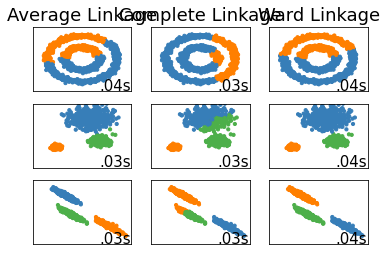

In [21]:
plt.figure(figsize=(10, 8))
# 執行各種樣板資料的繪圖迴圈
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # 複製參數與標準化
    params = default_base.copy()
    params.update(algo_params)    
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # 設定三種不同參數的 Hierarchical clustering
    ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="ward")
    complete = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="complete")
    average = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="average")
    clustering_algorithms = (
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward))

    # 繪製三種圖形
    for name, algorithm in clustering_algorithms:
        # t0 / t1 : 紀錄時間差
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1
plt.show()

# 觀察結果
* 同心圓 : 三者效果中 Complete 的效果似乎是最差
* 三群 : Average 與 Ward 效果都還不錯
* 斜三群 : 三者效果也是以 Complete 較差
* 同學可以試著替換不同的 random_state 觀察, 會有不同的結果

## sklearn make_circles()

References:

[sklearn dataset make_moons() make_circles()](https://ithelp.ithome.com.tw/articles/10262794) 

In [ ]:
nnoise = 0.1
ffactor = 0.5
X, y = make_circles(noise=nnoise, factor=ffactor, n_samples=100)
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y,
    marker='o', s=25, edgecolor='k', legend=False
    ).set_title('make_circles noise '+str(nnoise))
plt.show()

In [ ]:
''' sklearn toy datasets '''
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles

#--- Make two interleaving half circles 2個交錯的半圓型 (半月狀)
def mkMoons(nnoise=0.1, nCount=1000, nfig=0):
    X, y = make_moons(noise=nnoise, n_samples=nCount)
    sns.scatterplot(
        x=X[:, 0], y=X[:, 1], hue=y,
        marker='o', s=25, edgecolor='k', legend=False
        ).set_title('make_moons noise '+str(nnoise))
    plt.savefig('moon'+str(nfig)+'.jpg')
    plt.show()

#--- Make a large circle containing a smaller circle 大圓圈內有小圓圈
# factor :Scale factor between inner and outer circle in the range (0, 1)
def mkCircles(nnoise=0.1,nCount=1000, nfactor=0.5, nfig=0):
    X, y = make_circles(noise=nnoise, factor=nfactor, n_samples=nCount)
    sns.scatterplot(
        x=X[:, 0], y=X[:, 1], hue=y,
        marker='o', s=25, edgecolor='k', legend=False
        ).set_title('make_circles noise '+str(nnoise))
    plt.savefig('circle'+str(nfig)+'.jpg')
    plt.show()
    
#--- call function
distance = [0.1, 0.2, 0.5, 0.7, 0.9]
k = 0
for d in distance:
    mkMoons(d,1000,k)
    k += 1
    
k = 0
for d in distance:
    mkCircles(d,1000,0.5,k)
    k += 1


## sklearn make_blobs

References:

[【用sklearn學習機器學習】非監督式學習之k-平均演算法](https://ithelp.ithome.com.tw/articles/10236274)

sklearn有個好用的函數sklearn.datasets.make_blobs，
可以協助我們產生多堆有中心點的資料(參考: sklearn.datasets.make_blobs)

這邊解說make_blobs的參數:

    n_samples: 資料總數量
    n_features: 資料維度，一般設成二維方便視覺化地繪出
    centers: 資料共分成幾堆
    cluster_std: 數字設愈小資料愈集中，反之則愈散

make_blobs的回傳值data是一個tuple，
data[0] 是200*2的二維陣列，記錄每筆資料的x,y值
data[1] 是長度200的一維陣列，表示每筆資料的類別

In [ ]:
# 第一步: 隨機創建訓練用的資料
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.8,random_state=101)

# 第二步: 將資料視覺化繪製成散點圖
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')
plt.savefig('fig_0.8.png', bbox_inches='tight') #若需要保存圖檔加入此行
plt.show()